In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("./ml-100k/u.data", sep = '\t', header = None, names=rating_header)

In [3]:
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
# load the user data into a dataframe
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("./ml-100k/u.user", sep = '|', header = None, names=user_header)

In [6]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [9]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("./ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [10]:
# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
item_id         1682 non-null int64
title           1682 non-null object
release_date    1681 non-null object
IMDb_URL        1679 non-null object
unknown         1682 non-null int64
Action          1682 non-null int64
Adventure       1682 non-null int64
Animation       1682 non-null int64
Children's      1682 non-null int64
Comedy          1682 non-null int64
Crime           1682 non-null int64
Documentary     1682 non-null int64
Drama           1682 non-null int64
Fantasy         1682 non-null int64
Film-Noir       1682 non-null int64
Horror          1682 non-null int64
Musical         1682 non-null int64
Mystery         1682 non-null int64
Romance         1682 non-null int64
Sci-Fi          1682 non-null int64
Thriller        1682 non-null int64
War             1682 non-null int64
Western         1682 non-null int64
dtypes: int64(20), object(3)
memory usage: 302.4+ KB


# Data Transformation and Combination
Some ML approaches expect the data set with numerical values only, the following codes show how to convert catergorical data into numbers

In [12]:
# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [13]:
occupation = pd.read_csv("./ml-100k/u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [14]:
users_num = users_num.drop(columns=['user_id','zip_code'])
print(users_num)

     age  gender  occupation
0     24       1          19
1     53       0          13
2     23       1          20
3     24       1          19
4     33       0          13
..   ...     ...         ...
938   26       0          18
939   32       1           0
940   20       1          18
941   48       0          10
942   22       1          18

[943 rows x 3 columns]


In [15]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False).head()

,item_id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0


In [16]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movies[["item_id", "title"]])

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e89e3350>]],
      dtype=object)

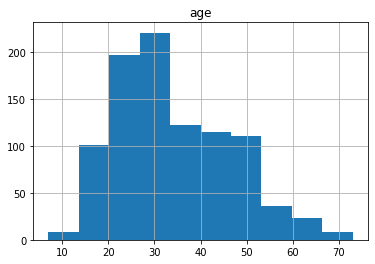

In [17]:
# age intervals distrubution
users.hist(column="age")
#users["age_category"] = pd.cut(users["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
#users["age_category"].hist()

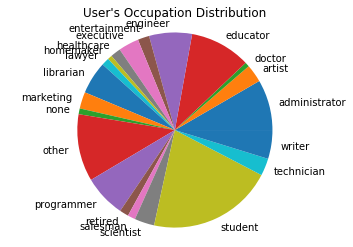

In [18]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count, labels=occupation_count.index.tolist())
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

<BarContainer object of 2 artists>

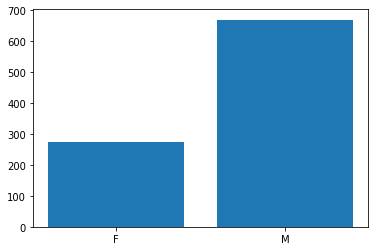

In [19]:
gender_count = users[["user_id", "gender"]].groupby("gender", as_index=False).size()
# print(gender_count.)
plt.bar(gender_count.index.tolist(),gender_count)

# Clustering the movies by genre

In [20]:
cos_sim = cosine_similarity(users_num)
print(cos_sim)

[[1.         0.90885376 0.9989385  ... 0.99799741 0.89368376 0.99986755]
 [0.90885376 1.         0.88871877 ... 0.88064916 0.99938269 0.90196862]
 [0.9989385  0.88871877 1.         ... 0.999845   0.87210522 0.99954733]
 ...
 [0.99799741 0.88064916 0.999845   ... 1.         0.86351248 0.99889116]
 [0.89368376 0.99938269 0.87210522 ... 0.86351248 1.         0.8862923 ]
 [0.99986755 0.90196862 0.99954733 ... 0.99889116 0.8862923  1.        ]]


In [35]:
# assign the id for cosine_df
cosin_df = pd.DataFrame(cos_sim)
item_id_set = np.arange(1,944,1)

# predict the movie for user 

In [83]:
#picked the unwatched movie for user
picked_userid = 1
picked_item_id = 111

In [84]:
cosin_df_six = cosin_df[picked_userid-1]
cosin_df_six.index = item_id_set
cosin_df_six.index.name = 'user_id'
df_six = cosin_df_six.to_frame()
df_six.columns = ['sim']
# cosine = np.dot(A,B)/(norm(A)*norm(B))
print (df_six)

              sim
user_id          
1        1.000000
2        0.908854
3        0.998938
4        1.000000
5        0.956475
...           ...
939      0.997415
940      0.784265
941      0.997997
942      0.893684
943      0.999868

[943 rows x 1 columns]


In [85]:
rating_u = pd.read_csv("./ml-100k/u1.base", sep = '\t', header = None, names=rating_header)
rating_u.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [86]:
#merge the ratind data and similarity of picked movie
rating_u1 = rating_u[rating_u['item_id']==picked_item_id]

df_merge1 = pd.merge(rating_u1,df_six,left_index=True, right_index=True)
print(df_merge1)

     user_id  item_id  rating  timestamp       sim
59         1      111       5  889751711  0.820569
140        2      111       4  888551853  0.991134
322        6      111       2  883599478  0.997997
938       13      111       5  882140588  0.978337


In [87]:
#calculate rating 
item_sum = 0

for u1_watched_item_id in range(len(df_merge1)):
    sum = df_merge1.iloc[u1_watched_item_id]['rating']*df_merge1.iloc[u1_watched_item_id]['sim']
    print(sum)
    item_sum +=sum

similartiy_sum = df_merge1['sim'].sum()
predict_rating = round(item_sum/df_merge1['sim'].sum())
print("final rate : ",predict_rating)

4.102845278154163
3.9645361292565626
1.9959948132356562
4.891683905218266
final rate :  4.0
